# Computer Vision 2025 Assignment 1: Image filtering.

In this assignment, you will research, implement and test some image filtering operations. Image filtering by convolution is a fundamental step in many computer vision tasks and you will find it useful to have a firm grasp of how it works. For example, later in the course we will come across Convolutional Neural Networks (CNNs) which are built from convolutional image filters.

The main aims of the assignment are:

- to understand the basics of how images are stored and processed in memory;
- to gain exposure to several common image filters, and understand how they work;
- to get practical experience implementing convolutional image filters;
- to test your intuition about image filtering by running some experiments;
- to report your results in a clear and concise manner.

*This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.*

## General instructions

Follow the instructions in this Python notebook and the accompanying file *a1code.py* to answer each question. It's your responsibility to make sure your answer to each question is clearly labelled and easy to understand. Note that most questions require some combination of Python code, graphical output, and text analysing or describing your results. Although we will check your code as needed, marks will be assigned based on the quality of your write up rather than for code correctness! This is not a programming test - we are more interested in your understanding of the topic.

Only a small amount of code is required to answer each question. We will make extensive use of the Python libraries

- [numpy](numpy.org) for mathematical functions
- [skimage](https://scikit-image.org) for image loading and processing
- [matplotlib](https://matplotlib.org/stable/index.html) for displaying graphical results
- [jupyter](https://jupyter.org) for Jupyter Notebooks

You should get familiar with the documentation for these libraries so that you can use them effectively.

# The Questions

To get started, below is some setup code to import the libraries we need. You should not need to edit it.

In [ ]:
# Numpy is the main package for scientific computing with Python.
import numpy as np

#from skimage import io

# Imports all the methods we define in the file a1code.py
from a1code import *

# Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## Question 0: Numpy warm up! (Not Assesed. This part is for you to understand the basic of numpy)

Before starting the assignment, make sure you have a working Python 3 installation, with up to date versions of the libraries mentioned above. If this is all new to you, I'd suggest  downloading an all in one Python installation such as [Anaconda](https://www.anaconda.com/products/individual). Alternatively you can use a Python package manager such as pip or conda, to get the libraries you need. If you're struggling with this please ask a question on the MyUni discussion forum.

For this assignment, you need some familiarity with numpy syntax. The numpy QuickStart should be enough to get you started:

https://numpy.org/doc/stable/user/quickstart.html

Here are a few warm up exercises to make sure you understand the basics. Answer them in the space below. Be sure to print the output of each question so we can see it!

1. Create a 1D numpy array Z with 12 elements. Fill with values 1 to 12.
2. Reshape Z into a 2D numpy array A with 3 rows and 4 columns.
3. Reshape Z into a 2D numpy array B with 4 rows and 3 columns.
4. Calculate the *matrix* product of A and B.
5. Calculate the *element wise* product of $A$ and $B^T$ (B transpose).


In [ ]:
import numpy as np

Z = np.arange(1,13)
print(Z)

print()

A = Z.reshape(3,4)
print(A)

print()

B = Z.reshape(4,3)
print(B)

print()

print(A @ B)

print()

print(A * np.transpose(B))


You need to be comfortable with numpy arrays because that is how we store images. Let's do that next!

## Question 1: Loading and displaying an image (10%)

Below is a function to display an image using the pyplot module in matplotlib. Implement the `load()` and `print_stats()` functions in a1code.py so that the following code loads the mandrill image, displays it and prints its height, width and channel.

In [ ]:
def display(img, caption=''):
    # Show image using pyplot
    plt.figure()
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

In [ ]:
image1 = load('images/whipbird.jpg')

display(image1, 'whipbird')

print_stats(image1)

Return to this question after reading through the rest of the assignment. Find **at least 2 more images** to use as test cases in this assignment for all the following questions and display them below. Use your print_stats() function to display their height, width and number of channels. Explain *why* you have chosen each image.

/home/riley/.local/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


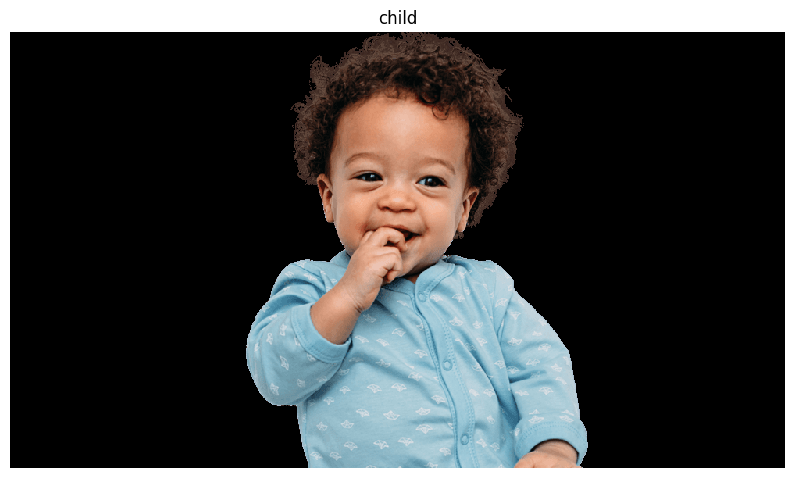

height:  558
width:  992
number of channels:  3


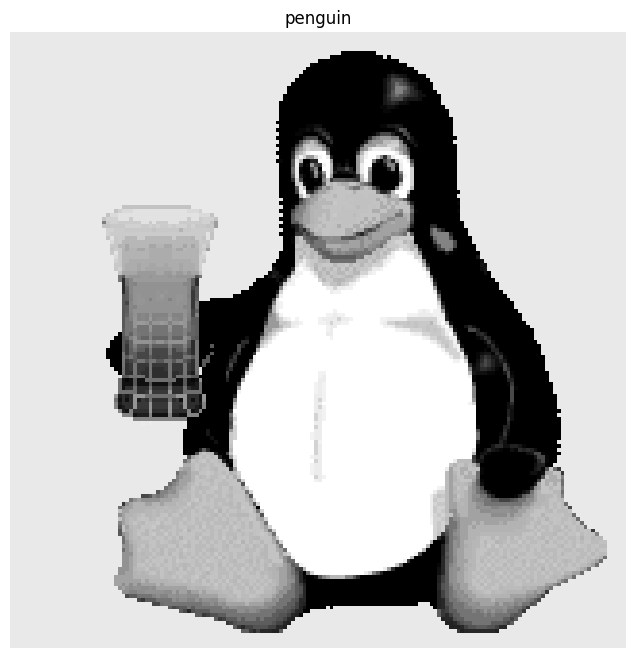

height:  160
width:  160
number of channels:  1


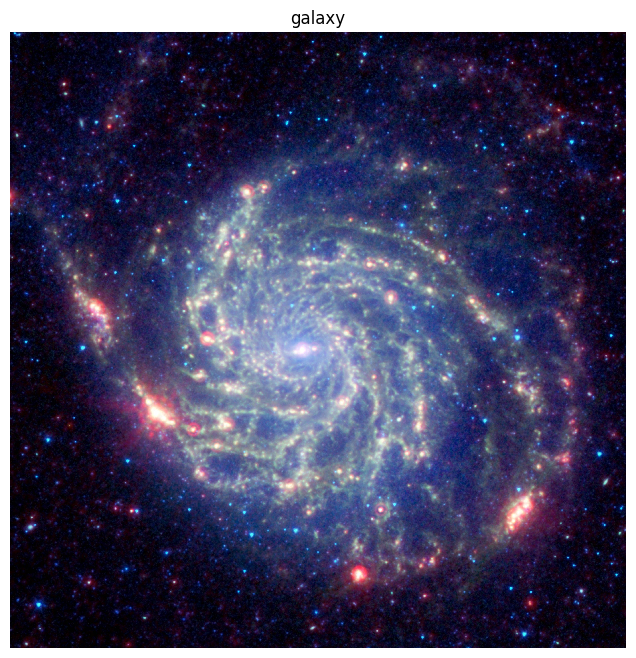

height:  4000
width:  4000
number of channels:  3


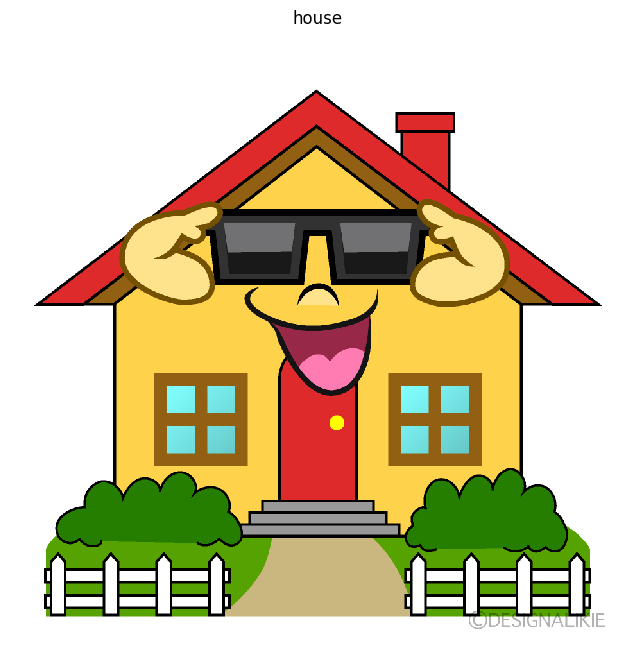

height:  960
width:  960
number of channels:  3


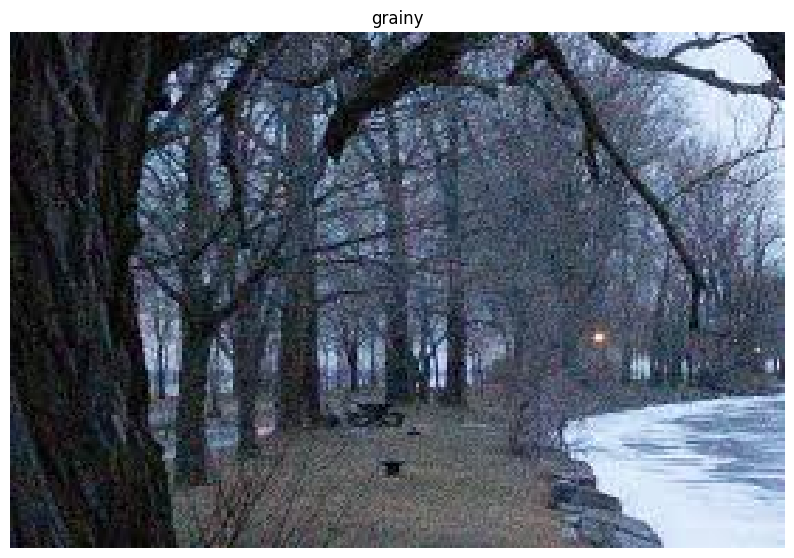

height:  183
width:  275
number of channels:  3


In [32]:
### Your code to load and display your images here
image2 = load("images/child.png")
display(image2, "child")
print_stats(image2)

image3 = load("images/pengbrew.png")
display(image3, "penguin")
print_stats(image3)

image4 = load("images/galaxy.jpg")
display(image4, "galaxy")
print_stats(image4)

image5 = load("images/house.png")
display(image5, "house")
print_stats(image5)

image6 = load("images/grainy.jpg")
display(image6, "grainy")
print_stats(image6)


image1 (child.png) - The first image I selected had transparent sections, and therefore the typical 3 channels of colour would not suffice for this image. I was curious as to whether or not the number of channels would reflect the transparency in the image. The fourth channel (the alpha channel) is used to reflect transparency, but in this case the transparent sections are converted to black and thus the number of channels is 3. I would need to modify the image read function to account for this fourth channel but I believe it is out of the scope of this assignment to do so.

image2 (pengbrew.png) - The second image I selected was a black-and-white image of a penguin, I selected this image such that I could ensure the number of channels present within the image would equate to a value of 1. Selecting this image is useful as it ensures that the shape function for an image is correctly identifying the number of channels present within an image, and can distinguish between other variation of channel counts.

image3 (galaxy.jpg) - The third image I selected was a large image of the galaxy, I selected this image to ensure the print_stats function could appropriately identify the size of images regardless of their size. In selecting this image and achieving the correct result I can validate the correctness of the width and height output of the print_stats function.

image4 (house.png) - The fourth image I selected was a cartoon picture depicting a house with a white background, I selected this image such that I could test the edge detection in the convolution section later on within this assignment. The image possesses strong edges with large variations in colour intensity that should be very simple to identify with an edge detection method.

image5 (grainy.jpg) - The fifth image I selected was a very small grainy image of a lakeside walkway, I selected this image such that I could test the noise-reduction filters like the gaussian filter. This image is incredibly pixelated and therefore should produce a significantly clearer result when exposed to gaussian blurring.

## Question 2: Image processing (30%)

Now that you have an image stored as a numpy array, let's try some operations on it.

1. Implement the `crop()` function in a1code.py. Use array slicing to crop the image.
2. Implement the `resize()` function in a1code.py.
3. Implement the `change_contrast()` function in a1code.py.
4. Implement the `greyscale()` function in a1code.py.
5. Implement the `binary()` function in a1code.py.

What do you observe when you change the threshold of the binary function?

Apply all these functions with different parameters on your own test images.

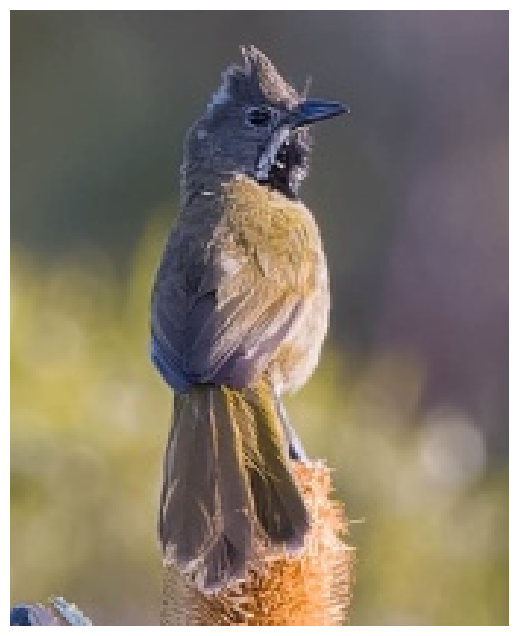

height:  210
width:  170
number of channels:  3


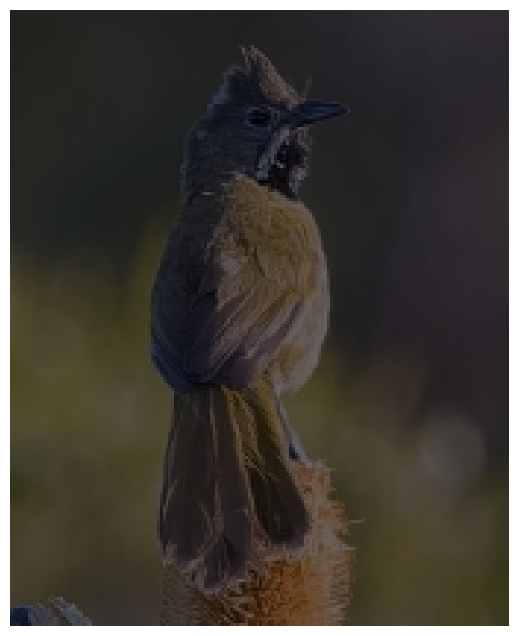

height:  210
width:  170
number of channels:  3


TypeError: Image data of dtype object cannot be converted to float

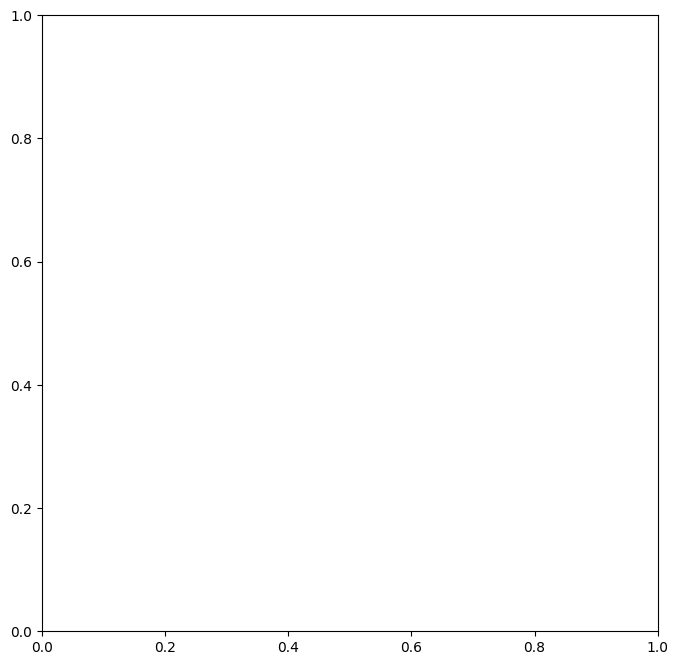

In [50]:
# This should crop the bird from the  image; you will need to adjust the parameters for the correct crop size and location
crop_img = crop(image1, 120, 250, 210, 170)
display(crop_img)
print_stats(crop_img)

resize_img = resize(crop_img, 500, 600)
display(resize_img)
print_stats(resize_img)

contrast_img = change_contrast(image1, 0.5)
display(contrast_img)
print_stats(contrast_img)

contrast_img = change_contrast(image1, 1.5)
display(contrast_img)
print_stats(contrast_img)

grey_img = greyscale(image1)
display(grey_img)
print_stats(grey_img)

binary_img = binary(grey_img, 0.3)
display(binary_img)
print_stats(binary_img)

binary_img = binary(grey_img, 0.7)
display(binary_img)
print_stats(binary_img)

# Add your own tests here...


## Question 3: Convolution (30%)

### 3.1(a) 2D convolution

Using the definition of 2D convolution from week 1, implement the convolution operation in the function `conv2D()` in a1code.py.


In [ ]:
test_conv2D()

### 3.1(b) RGB convolution

In the function `conv` in a1code.py, extend your function `conv2D` to work on RGB images, by applying the 2D convolution to each channel independently.

### 3.2 Gaussian filter convolution

Use the `gauss2D` function provided in a1code.py to create a Gaussian kernel, and apply it to your images with convolution. You will obtain marks for trying different tests and analysing the results, for example:

- try varying the image size, and the size and variance of the filter  
- subtract the filtered image from the original - this gives you an idea of what information is lost when filtering

What do you observe and why?

### 3.3 Sobel filters

Define a horizontal and vertical Sobel edge filter kernel and test them on your images. You will obtain marks for testing them and displaying results in interesting ways, for example:

- apply them to an image at different scales
- considering how to display positive and negative gradients
- apply different combinations of horizontal and vertical filters as asked in the Assignment sheet.

In [ ]:
# Your code to answer 3.3, 3.4 and displaay results here.

***Your comments/analysis of your results here...***

## Question 4: Image sampling and pyramids (30%)

### 4.1 Image Sampling

- Apply your `resize()` function to reduce an image (I) to 0.5\*height and 0.5\*width

- Repeat the above procedure, but apply a Gaussian blur filter to your original image before downsampling it. How does the result compare to your previous output, and to the original image? Why?


### 4.2 Image Pyramids
- Create a Gaussian pyramid as described in week2's lecture on an image.

- Apply a Gaussian kernel to an image I, and resize it with ratio 0.5, to get $I_1$. Repeat this step to get $I_2$, $I_3$ and $I_4$.

- Display these four images in a manner analogus to the example shown in the lectures.




In [ ]:
# Your answers to question 4 here

***Your comments/analysis of your results here...***

## Question 5: (optional, assesed for granting up to 20% bonus marks for the A1)

Image filtering lectures, particularly Lecture 2, have covered the details related to this question. This is a bonus question for the students to get opportunities to recover lost marks in the other parts of the assignment. **Note that the overall marks will be capped at 100%**.

### 5.1 Apply and analyse a blob detector

- Create a Laplacian of Gaussian (LoG) filter in the function `LoG2D()` and visualize its response on your images. You can use the template function (and hints therein) for the task if you wish.

- Modify parameters of the LoG filters and apply them to an image of your choice. Show how these variations are manifested in the output.

- Repeat the experiment by rescaling the image with a combination of appropriate filters designed by you for these assignment. What correlations do you find when changing the scale or modifying the filters?

- How does the response of LoG filter change when you rotate the image by 90 degrees? You can write a function to rotate the image or use an externally rotated image for this task.





In [ ]:
# Your code to answer question 5 and display results here